In [2]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
from fbprophet.plot import add_changepoints_to_plot

In [3]:
import requests

POLONIEX_OHLCV_BASEURL = 'https://poloniex.com/public?command=returnChartData&currencyPair='

"""
https://poloniex.com/public?command=returnChartData&currencyPair=BTC_POT&start=1435699200&end=9999999999&period=14400

"""

def get_ohlcv_poloniex(pair='BTC_ETH', start=1435699200, end=9999999999, period=900):
    """
    returns ohlcv (open/high/low/close/volume) data for poloniex as pandas dataframe
    convert to unix timestamp using https://coderstoolbox.net/unixtimestamp/
    :param pair: str pair on poloniex
    :param start: int unix timestamp of beginning time
    :param end: int unix timestamp of ending time
    :param period: int candle width in seconds
    :return: pandas df of ohlcv data from poloniex for specified pair, times, and period
    """
    query = POLONIEX_OHLCV_BASEURL + pair + '&start=' + str(start) + '&end=' + str(end) + '&period=' + str(period)
    resp = requests.get(query)

    if resp.status_code != 200:
        raise requests.ApiError('GET /tasks/ {}'.format(resp.status_code))

    return pd.DataFrame(resp.json())

In [4]:
df = get_ohlcv_poloniex(pair='USDT_BTC', start=1483600958, end=9999999999, period=86400)
#one day in seconds
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = df['weightedAverage']
df['log'] = df['weightedAverage'].apply(np.log)

In [6]:
df

,close,date,high,low,open,quoteVolume,volume,weightedAverage,ds,y,log
0,896.000000,1483660800,1024.880000,870.000000,998.800000,6225.019034,5.718738e+06,918.669921,2017-01-06,918.669921,6.822927
1,907.190479,1483747200,910.827519,818.459718,896.000000,5134.100704,4.446078e+06,865.989646,2017-01-07,865.989646,6.763873
2,916.000000,1483833600,939.659554,891.100000,907.000000,2954.840845,2.712346e+06,917.932884,2017-01-08,917.932884,6.822124
3,902.000000,1483920000,916.418330,880.000000,916.418330,1743.424769,1.561327e+06,895.551415,2017-01-09,895.551415,6.797440
4,907.100000,1484006400,915.832309,898.000000,903.000000,862.985185,7.839126e+05,908.373157,2017-01-10,908.373157,6.811655
5,781.811601,1484092800,927.828104,751.000000,907.929452,7934.397548,6.522541e+06,822.058801,2017-01-11,822.058801,6.711812
6,803.695279,1484179200,832.879900,752.010200,781.851601,3910.824149,3.077949e+06,787.033432,2017-01-12,787.033432,6.668271
7,826.000000,1484265600,830.592908,776.028995,805.000004,2488.403247,2.009714e+06,807.632008,2017-01-13,807.632008,6.694107
8,817.477031,1484352000,836.040000,801.975002,827.000000,1348.387783,1.110991e+06,823.940432,2017-01-14,823.940432,6.714098
9,818.701245,1484438400,823.498000,805.000000,817.477031,899.259185,7.323802e+05,814.426114,2017-01-15,814.426114,6.702484


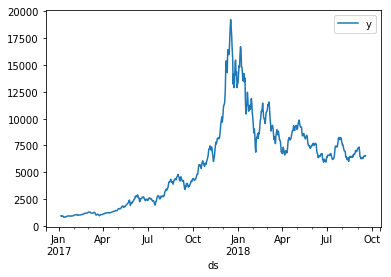

In [7]:
df.plot(x='ds',y='y')

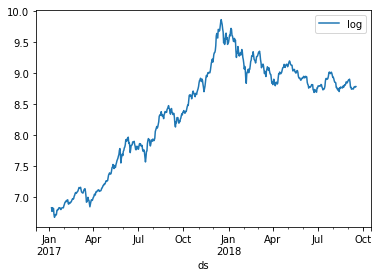

In [8]:
df.plot(x='ds',y='log')

## Kurtosis & Skew

In [9]:
df.y.kurtosis()

0.17278868298723582

A kurtosis this low (well below 3) means that there are less outliers than in a normal distribution.

In [10]:
df.y.skew()

0.7097080422770063

A skew > 0 means that the graph is asymmetric with a tail on the right.

## Prophet with various period values

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Linear Graphs


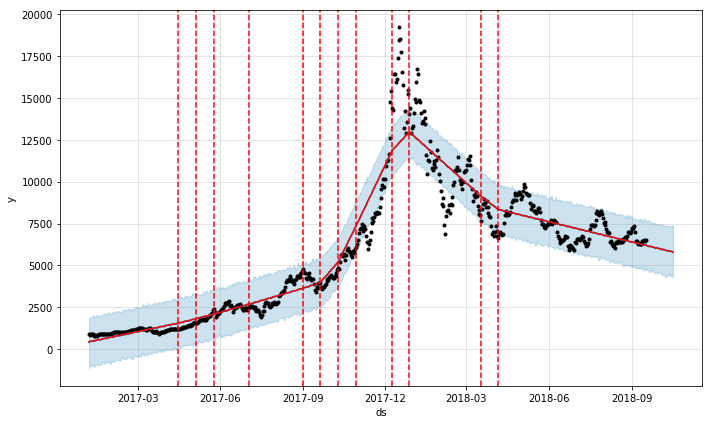

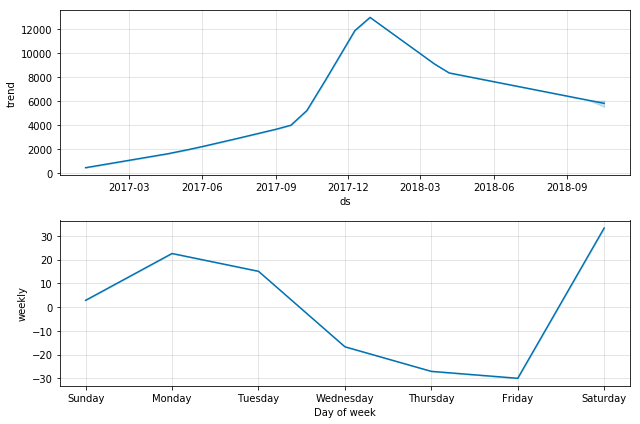

In [11]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=30) 
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Linear Graphs


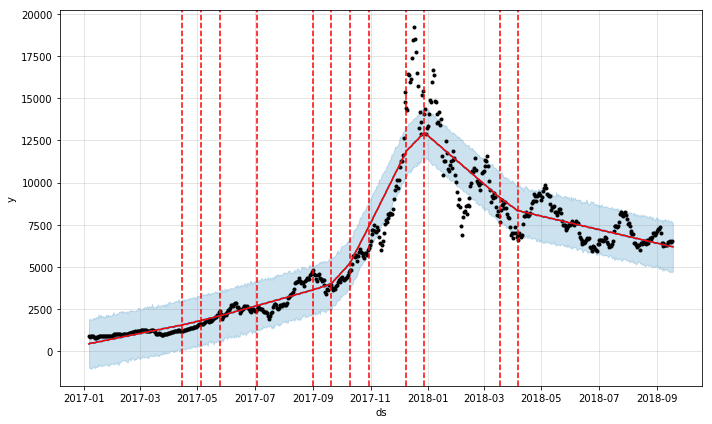

In [12]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
#fig2 = m.plot_components(forecast)

Linear Graphs


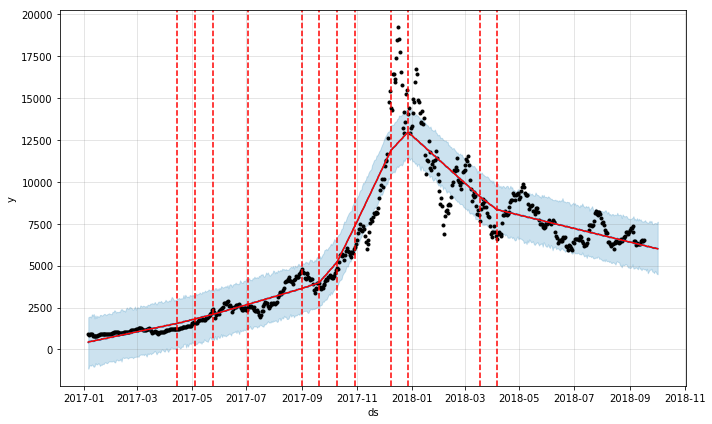

In [13]:
future = m.make_future_dataframe(periods=15)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
#fig2 = m.plot_components(forecast)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Log Graphs


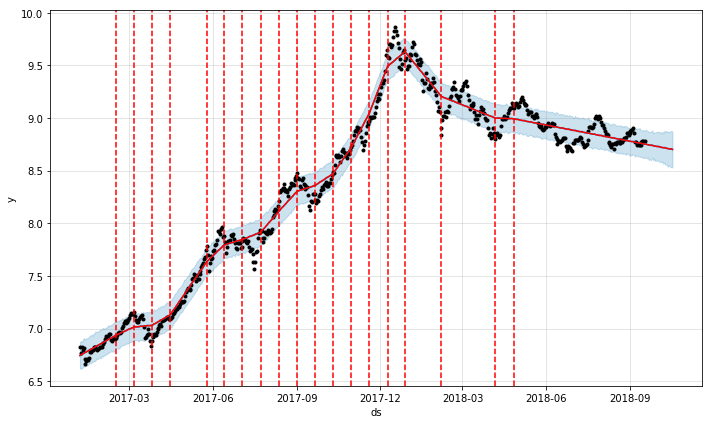

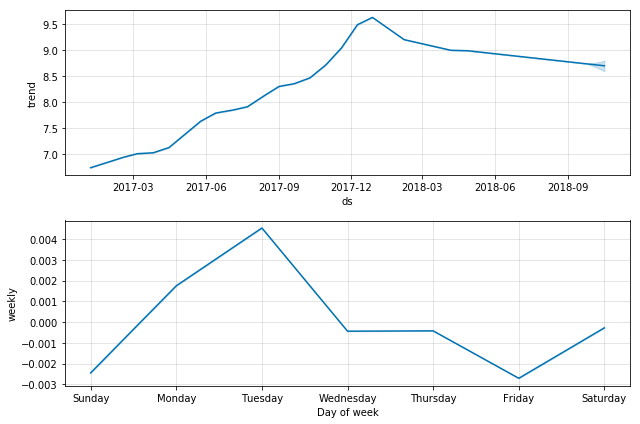

In [14]:
df['y'] = df['log']
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=30)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Log Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Log Graphs


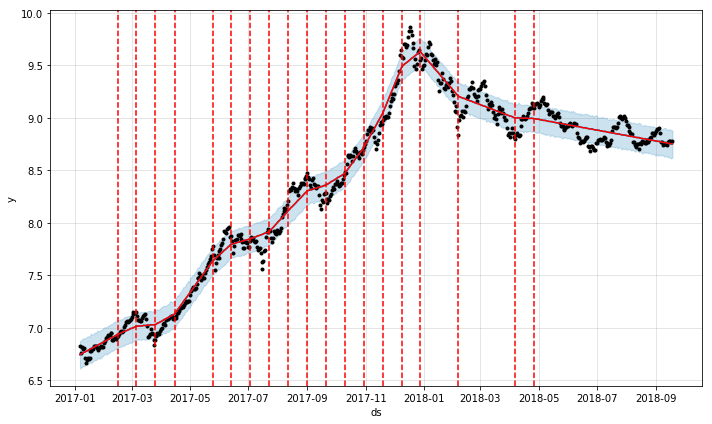

In [15]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Log Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
#fig2 = m.plot_components(forecast)

Log Graphs


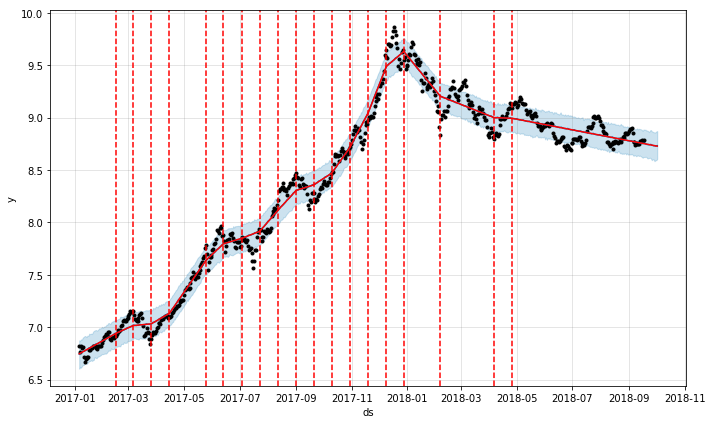

In [16]:
future = m.make_future_dataframe(periods=15)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Log Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
#fig2 = m.plot_components(forecast)

## Change Changepoint Scale

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


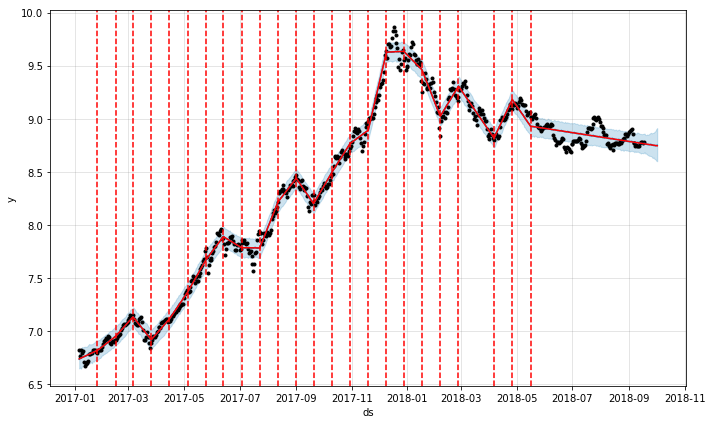

In [17]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


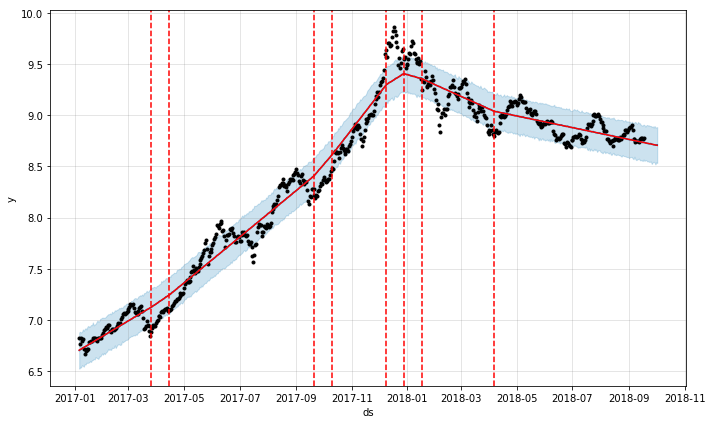

In [18]:
m = Prophet(changepoint_prior_scale=0.01)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Weekly Seasonality Analysis

May-September 2018

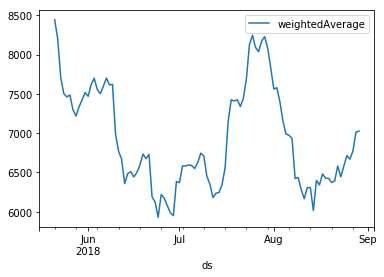

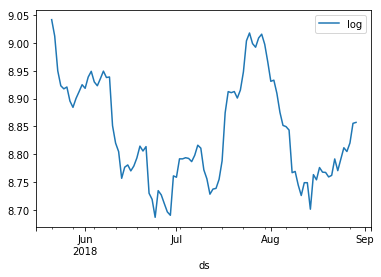

In [19]:
df2 = df.loc[500:600]
df2.plot(x='ds', y ='weightedAverage')
df2.plot(x='ds',y='log')

February - May 2018

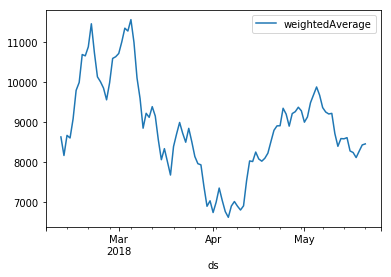

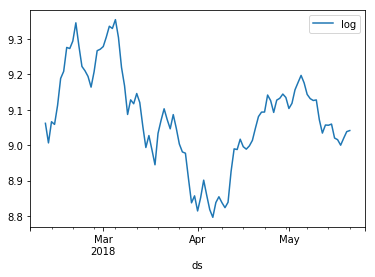

In [20]:
df2 = df.loc[400:500]
df2.plot(x='ds', y ='weightedAverage')
df2.plot(x='ds',y='log')

November 2017- February 2018

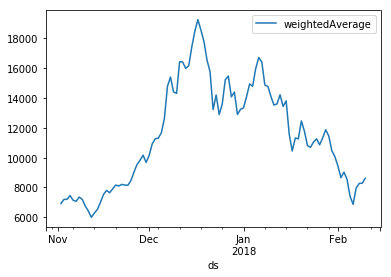

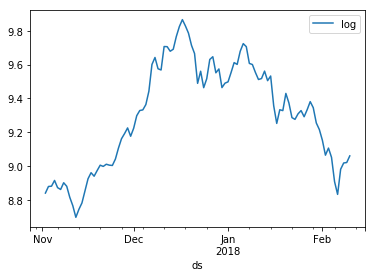

In [21]:
df2 = df.loc[300:400]
df2.plot(x='ds', y ='weightedAverage')
df2.plot(x='ds', y ='log')